In [1]:
from pybliometrics.scopus import ScopusSearch

In [6]:
query = ' TITLE-ABS-KEY ( machine  AND learning  OR  deep  AND learning )  AND  \
                 TITLE-ABS-KEY ( city )'

In [7]:
s = ScopusSearch(query, 
                 download=True, verbose=True)

Progress: |██████████████████████████████████████████████████| 100.00% Complete


In [8]:
s.get_results_size()

5275

In [9]:
import pandas as pd
df_s = pd.DataFrame(s.results)
df_s.head()

,eid,doi,pii,pubmed_id,title,subtype,subtypeDescription,creator,afid,affilname,...,issueIdentifier,article_number,pageRange,description,authkeywords,citedby_count,openaccess,fund_acr,fund_no,fund_sponsor
0,2-s2.0-85108515894,10.1016/j.aej.2021.04.099,S1110016821003410,None,Area and energy efficient shift and accumulato...,ar,Article,Hazarika A.,60115117;60015723;60000912,Indian Institute of Information Technology Guw...,...,1,None,795-809,Convolutional Neural Networks (CNNs) exhibit s...,Approximate computing | Convolution operation ...,0,1,PSU,MEITY-PHD-3043,Prince Sultan University
1,2-s2.0-85111630017,10.1038/s41467-021-24823-0,None,None,"Heatstroke predictions by machine learning, we...",ar,Article,Ogata S.,60030939;60027625;60025997;60025272;60016372,National Institute for Environmental Studies o...,...,1,4575,None,This study aims to develop and validate predic...,None,0,1,ERCA,JPMEERF20191005,Environmental Restoration and Conservation Agency
2,2-s2.0-85111089627,10.1038/s41746-021-00481-w,None,None,Clinical subphenotypes in COVID-19: derivation...,ar,Article,Su C.,60009343;60007997,Memorial Sloan-Kettering Cancer Center;Weill C...,...,1,110,None,The coronavirus disease 2019 (COVID-19) is het...,None,0,1,PCORI,PCORI/ HSD-1604-35187,Patient-Centered Outcomes Research Institute
3,2-s2.0-85110633815,10.1186/s12887-021-02788-9,None,None,Neonatal mortality prediction with routinely c...,ar,Article,Batista A.F.M.,60032499;60008088;112643394,Harvard T.H. Chan School of Public Health;Univ...,...,1,322,None,Background: Recent decreases in neonatal morta...,Artificial intelligence | Birth records | Braz...,0,1,BMGF,25000.028646/2018–10,Bill and Melinda Gates Foundation
4,2-s2.0-85110275764,10.1007/s41109-021-00395-2,None,None,Citywide quality of health information system ...,ar,Article,Funkner A.A.,60072485;126582100;121451557,Saint Petersburg National Research University ...,...,1,53,None,A system of hospitals in large cities can be c...,Data completeness | Electronic health record |...,0,1,Minobrnauka,2019-1339,Ministry of Education and Science of the Russi...


In [62]:
s0 = df_s.loc[0]
s0

eid                                                   2-s2.0-85108515894
doi                                            10.1016/j.aej.2021.04.099
pii                                                    S1110016821003410
pubmed_id                                                           None
title                  Area and energy efficient shift and accumulato...
subtype                                                               ar
subtypeDescription                                               Article
creator                                                      Hazarika A.
afid                                          60115117;60015723;60000912
affilname              Indian Institute of Information Technology Guw...
affiliation_city                                  Guwahati;Riyadh;Howrah
affiliation_country                             India;Saudi Arabia;India
author_count                                                           4
author_names           Hazarika, Anakhi;Poddar, Sou

In [66]:
df_s["aggregationType"].unique()

array(['Journal', 'Conference Proceeding', 'Book', 'Book Series',
       'Trade Journal'], dtype=object)

In [79]:
df_s["year"] = df_s["coverDate"].apply(lambda x: x.split("-")[0])
df_s["year"] = df_s["year"].astype(int)
df_s["num_pub"] = [1] * df_s.shape[0]
df_pubyear = df_s.query("aggregationType == 'Journal'").groupby("year").sum()
df_pubyear.values.T

array([[  1,   1,   1,   2,   1,   1,   2,   1,   1,   1,   1,   5,   4,
          9,   7,  12,  21,  13,  18,  36,  49,  71, 113, 256, 457, 724,
        696,   1]])

In [107]:
df_s.tail()

,eid,doi,pii,pubmed_id,title,subtype,subtypeDescription,creator,afid,affilname,...,pageRange,description,authkeywords,citedby_count,openaccess,fund_acr,fund_no,fund_sponsor,year,num_pub
5270,2-s2.0-84972714433,10.1177/089443938700500413,None,None,Software reviews: Start reviewed by Carole L. ...,re,Review,None,None,None,...,584-585,The START series of 10 programs contains a bro...,None,0,0,None,undefined,None,1987,1
5271,2-s2.0-0041499406,10.1017/S0022050700048178,None,None,Learning by Selling and Invention: The Case of...,ar,Article,Thomson R.,60004182,The New School,...,433-445,"For techniques diffusing as commodities, sales...",None,11,0,None,undefined,None,1987,1
5272,2-s2.0-37049076357,10.1039/AN9861101077,AN9861101077,3777444,Description of air pollution by means of patte...,ar,Article,Roelofs G.,60016529,Radboud University Nijmegen,...,1077-1083,Based on meteorological observations and hourl...,Air pollution | Bayes classification | Environ...,3,0,None,undefined,None,1986,1
5273,2-s2.0-84972621053,10.1177/089443938500300310,None,None,Software Reviews : Nationalism: Past and Prese...,re,Review,None,None,None,...,256-258,Nationalism: Past and Present by Focus Media i...,None,0,0,None,undefined,None,1985,1
5274,2-s2.0-0016886154,None,None,None,VERBAL COMMUNICATION SYSTEM ENHANCES COMPUTER/...,ar,Article,Freeman M.,None,None,...,81-87,A computerized teaching robot has been built a...,None,0,0,None,undefined,None,1976,1


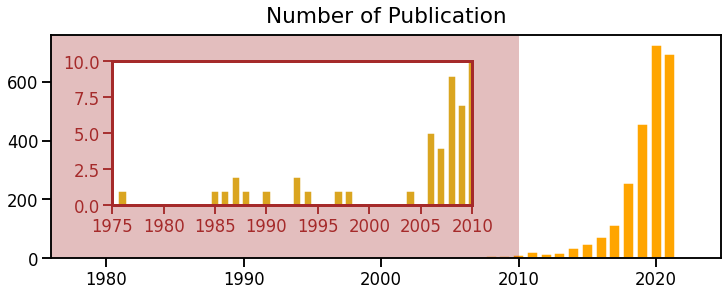

In [112]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context("talk")

fig, ax = plt.subplots(figsize=(10, 4), constrained_layout=True)
ax.bar(df_pubyear.index, df_pubyear["num_pub"], fc="orange", ec="w")
ax.set_title("Number of Publication", fontsize="large", pad=12)


c_inset = "brown"
ax_inset = fig.add_axes([0.15, 0.3, 0.5, 0.5])
ax_inset.bar(df_pubyear.index, df_pubyear["num_pub"], fc="goldenrod", ec="w")
ax_inset.set_xlim(df_pubyear.index.min()-1, 2010)
ax_inset.set_ylim(0, 10)
ax_inset.spines[["left", "right", "bottom", "top"]].set_edgecolor(c_inset)
ax_inset.spines[["left", "right", "bottom", "top"]].set_linewidth(3)
ax_inset.tick_params(color=c_inset, labelcolor=c_inset)

ax.axvspan(df_pubyear.index.min(), 2010, fc=c_inset, alpha=0.3)
ax.set_title("Number of Publication", fontsize="large", pad=12)
ax.set_xlim(df_pubyear.index.min(), )
fig.savefig("82_scopusapi_11.png")